In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('churn_dataset.csv')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
print(df['gender'].value_counts().sort_values())
print(df['Partner'].value_counts().sort_values())
print(df['Dependents'].value_counts().sort_values())
print(df['PhoneService'].value_counts().sort_values())

Female    3488
Male      3555
Name: gender, dtype: int64
Yes    3402
No     3641
Name: Partner, dtype: int64
Yes    2110
No     4933
Name: Dependents, dtype: int64
No      682
Yes    6361
Name: PhoneService, dtype: int64


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Manipulation

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df = df.drop('customerID',axis = 1)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


C:\Users\mahalakshmi\AppData\Local\Temp\ipykernel_9368\2858450129.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

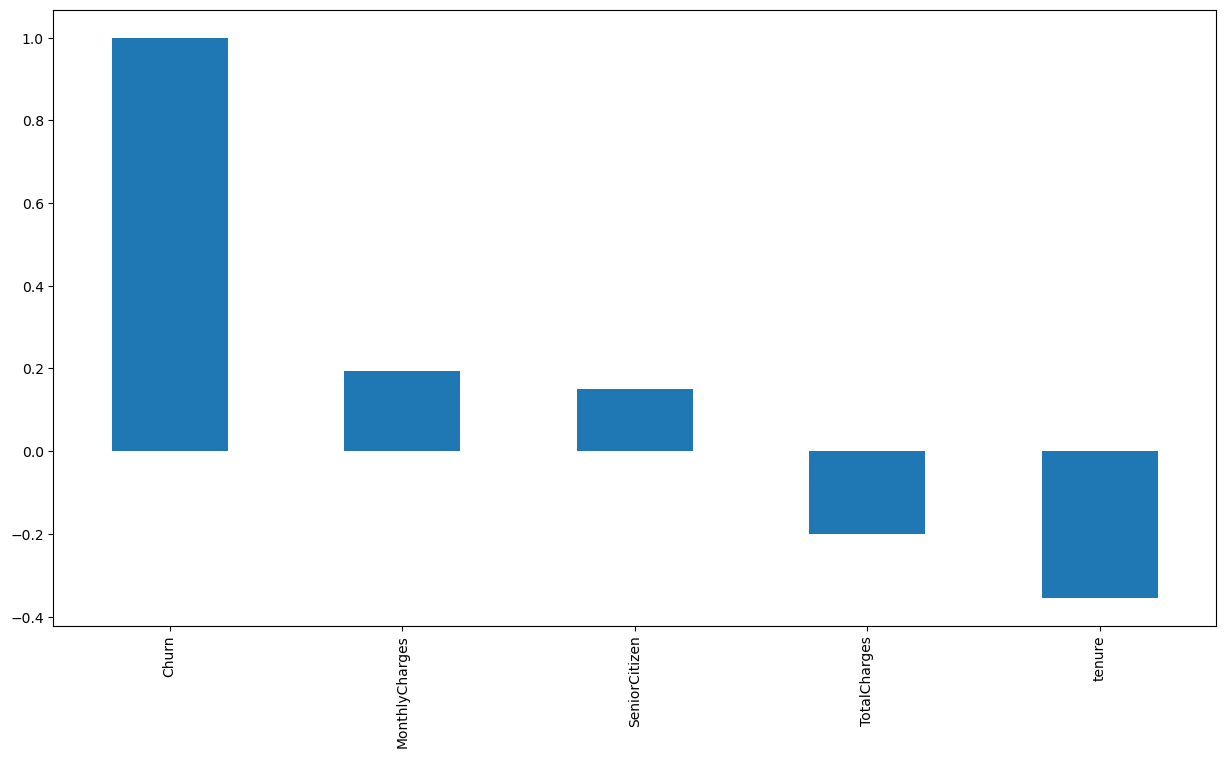

In [16]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Train-Test Split

In [17]:
y = df.pop('Churn')
X = df

In [18]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

In [20]:
print(X_train.shape)
print(X_test.shape)

(5274, 19)
(1758, 19)


In [21]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [22]:
X_train_cat = X_train.select_dtypes(include=["object"])
X_train_num = X_train.select_dtypes(include=["float64","int64"])

In [23]:
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3122,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic)
5893,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
1282,Male,No,No,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check
1908,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
6724,Female,No,No,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,Two year,Yes,Credit card (automatic)


In [24]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3122,1,68,19.50,1193.55
5893,0,12,24.00,269.65
1282,0,1,62.80,62.80
1908,0,69,19.95,1399.35
6724,1,64,70.20,4481.00


# Preprocessing

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3122,2.308968,1.445518,-1.488473,-0.476098
5893,-0.433094,-0.832047,-1.339277,-0.885808
1282,-0.433094,-1.279426,-0.052883,-0.977538
1908,-0.433094,1.486189,-1.473553,-0.384835
6724,2.308968,1.282835,0.192460,0.981746


In [26]:
X_train_num_transformed.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5.274000e+03,5.274000e+03,5.274000e+03,5.274000e+03
mean,2.896600e-17,1.751433e-17,2.815765e-16,-9.834968e-17
std,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00
min,-4.330939e-01,-1.279426e+00,-1.529916e+00,-9.970496e-01
25%,-4.330939e-01,-9.540596e-01,-9.845242e-01,-8.285691e-01
50%,-4.330939e-01,-1.406436e-01,1.908027e-01,-3.883601e-01
75%,-4.330939e-01,9.167974e-01,8.389732e-01,6.691194e-01
max,2.308968e+00,1.608201e+00,1.802111e+00,2.840475e+00


In [27]:
X_train_num_transformed.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.009862,0.217672,0.094448
tenure,0.009862,1.000000,0.239139,0.822875
MonthlyCharges,0.217672,0.239139,1.000000,0.647623
TotalCharges,0.094448,0.822875,0.647623,1.000000


In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
X_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_transformed.shape)

X_train_cat_transformed.head()

Shape of Data before Transformation: (5274, 15)
Shape of Data after Transformation: (5274, 41)


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3122,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5893,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1282,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1908,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6724,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['gender' 'Partner' 'Dependents' 'PhoneService' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'Contract'
 'PaperlessBilling' 'PaymentMethod']
Unique Categories: [array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'No phone service', 'Yes'], dtype=object), array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['Month-to-month', 'One year', 'Two year'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Bank transf

In [30]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3122,2.308968,1.445518,-1.488473,-0.476098,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5893,-0.433094,-0.832047,-1.339277,-0.885808,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1282,-0.433094,-1.279426,-0.052883,-0.977538,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1908,-0.433094,1.486189,-1.473553,-0.384835,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6724,2.308968,1.282835,0.192460,0.981746,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
X_test.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [32]:
X_test_cat = X_test.select_dtypes(include=["object"])
X_test_num = X_test.select_dtypes(include=["float64","int64"])

In [33]:
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5449,Male,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic)
6539,Female,Yes,No,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
2927,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2477,Male,No,No,Yes,No,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check
6215,Female,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check


In [34]:
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5449,0,67,103.15,6895.50
6539,0,26,73.05,1959.50
2927,0,1,69.90,69.90
2477,0,3,86.05,244.85
6215,1,6,98.25,560.60


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_test_num.index)

X_test_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5449,-0.461791,1.421006,1.245718,1.983913
6539,-0.461791,-0.258615,0.236192,-0.161815
2927,-0.461791,-1.282774,0.130544,-0.983242
2477,-0.461791,-1.200841,0.672200,-0.907190
6215,2.165484,-1.077942,1.081377,-0.769930


In [36]:
X_test_num_transformed.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1.758000e+03,1.758000e+03,1.758000e+03,1.758000e+03
mean,-5.254298e-17,1.252948e-16,3.273832e-16,2.425061e-17
std,1.000285e+00,1.000285e+00,1.000285e+00,1.000285e+00
min,-4.617906e-01,-1.282774e+00,-1.586657e+00,-1.005326e+00
25%,-4.617906e-01,-9.550430e-01,-8.517320e-01,-8.352944e-01
50%,-4.617906e-01,-1.357157e-01,1.833680e-01,-4.027200e-01
75%,-4.617906e-01,9.294099e-01,8.231260e-01,6.658619e-01
max,2.165484e+00,1.625838e+00,1.763897e+00,2.761739e+00


In [37]:
X_test_num_transformed.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.032774,0.225039,0.123997
tenure,0.032774,1.000000,0.270986,0.835397
MonthlyCharges,0.225039,0.270986,1.000000,0.661302
TotalCharges,0.123997,0.835397,0.661302,1.000000


In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
X_test_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)

print("Shape of Data before Transformation:", X_test_cat.shape)
print("Shape of Data after Transformation:", X_test_cat_transformed.shape)

X_test_cat_transformed.head()

Shape of Data before Transformation: (1758, 15)
Shape of Data after Transformation: (1758, 41)


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5449,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6539,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2927,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2477,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6215,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['gender' 'Partner' 'Dependents' 'PhoneService' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'Contract'
 'PaperlessBilling' 'PaymentMethod']
Unique Categories: [array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'No phone service', 'Yes'], dtype=object), array(['DSL', 'Fiber optic', 'No'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['No', 'No internet service', 'Yes'], dtype=object), array(['Month-to-month', 'One year', 'Two year'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Bank transf

In [40]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5449,-0.461791,1.421006,1.245718,1.983913,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6539,-0.461791,-0.258615,0.236192,-0.161815,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2927,-0.461791,-1.282774,0.130544,-0.983242,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2477,-0.461791,-1.200841,0.672200,-0.907190,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6215,2.165484,-1.077942,1.081377,-0.769930,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# ML Models

In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train_transformed, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

KN_regressor = KNeighborsRegressor()
KN_regressor.fit(X_train_transformed, y_train)
y_test_pred_KN = KN_regressor.predict(X_test_transformed)

KNN = metrics.mean_absolute_error(y_test, y_test_pred_KN)
print("score: ", KNN)

score:  0.28680318543799777


Text(0, 0.5, 'Predicted Y')

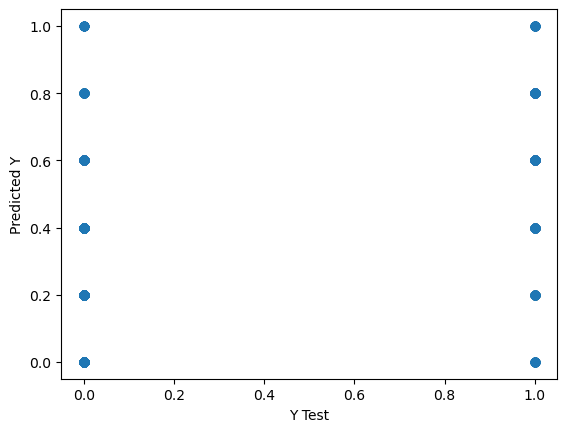

In [46]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

L_regressor = LogisticRegression()
L_regressor.fit(X_train_transformed,y_train)

y_test_pred_L = L_regressor.predict(X_test_transformed)

LR = metrics.accuracy_score(y_test, y_test_pred_L)
print("score: ", LR)

score:  0.8043230944254836


Text(0, 0.5, 'Predicted Y')

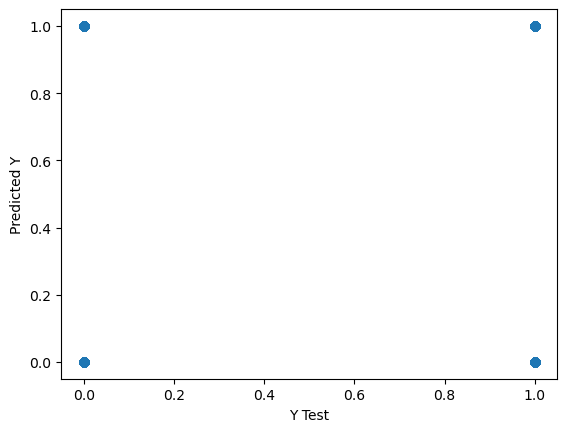

In [48]:
plt.scatter(y_test,y_test_pred_L)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train_transformed, y_train)

y_test_pred_DT = DT_classifier.predict(X_test_transformed)

DT = metrics.accuracy_score(y_test, y_test_pred_DT)
print("score: ", DT)

score:  0.6899886234357224


Text(0, 0.5, 'Predicted Y')

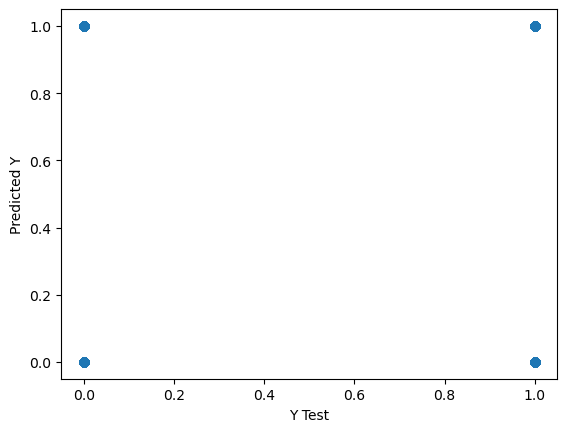

In [50]:
plt.scatter(y_test,y_test_pred_DT)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_transformed, y_train)

y_test_pred_RF = RF_classifier.predict(X_test_transformed)

RF = metrics.accuracy_score(y_test, y_test_pred_RF)
print("score: ", RF)

score:  0.7895335608646189


Text(0, 0.5, 'Predicted Y')

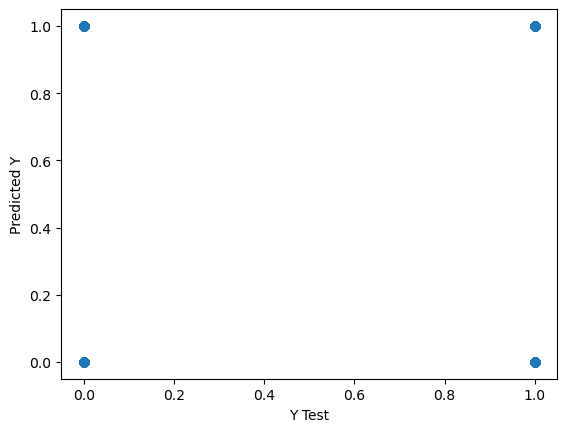

In [52]:
plt.scatter(y_test,y_test_pred_RF)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [53]:
from sklearn.svm import SVC
from sklearn import metrics

SVM_classifier = SVC(kernel = 'linear',gamma = 'scale', C = 2)
SVM_classifier.fit(X_train_transformed, y_train)

y_test_pred_SVC = SVM_classifier.predict(X_test_transformed)

SVC = metrics.accuracy_score(y_test, y_test_pred_SVC)
print("score: ", SVC)

score:  0.8031854379977247


In [55]:
from sklearn.svm import SVC
from sklearn import metrics

SVM_classifier = SVC(kernel = 'rbf',gamma = 'scale', C = 2)
SVM_classifier.fit(X_train_transformed, y_train)

y_test_pred_SVC = SVM_classifier.predict(X_test_transformed)

SVC = metrics.accuracy_score(y_test, y_test_pred_SVC)
print("score: ", SVC)

score:  0.8020477815699659


Text(0, 0.5, 'Predicted Y')

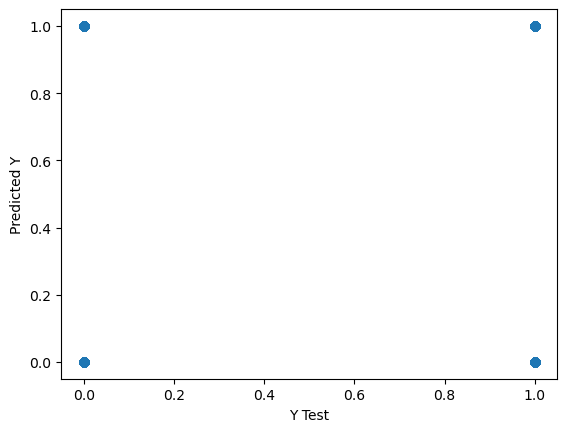

In [54]:
plt.scatter(y_test,y_test_pred_SVC)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [84]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['KNeighborsRegressor'] = y_test_pred_KN
output_df['LogisticRegression'] = y_test_pred_L
output_df['DecisionTreeClassifier'] = y_test_pred_DT
output_df['RandomForestClassifier'] = y_test_pred_RF
output_df['SupportVectorClassifier'] = y_test_pred_SVC
output_df

,Actual,KNeighborsRegressor,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,SupportVectorClassifier
5449,0,0.0,0,0,0,0
6539,0,0.0,0,0,0,0
2927,0,1.0,1,1,1,1
2477,0,0.8,1,0,1,1
6215,1,1.0,1,0,1,1
...,...,...,...,...,...,...
2349,0,0.0,0,0,0,0
3249,0,0.6,0,0,0,0
5610,1,0.8,1,1,1,1
4856,1,0.2,1,1,0,0


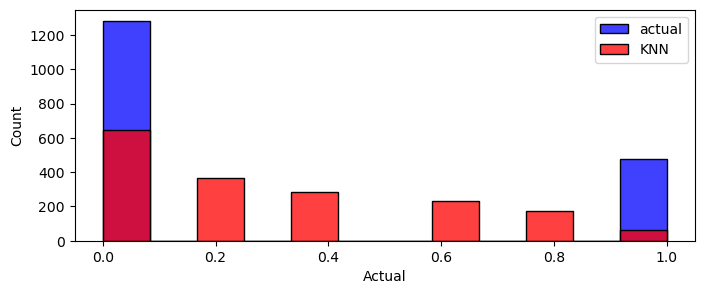

In [87]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', label="actual")
sns.histplot(output_df['KNeighborsRegressor'], color='red', label="KNN")

plt.legend()

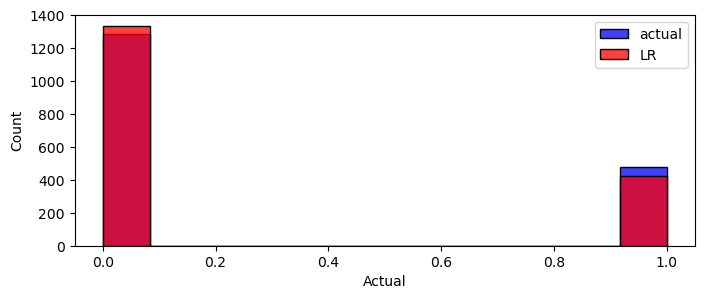

In [88]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', label="actual")
sns.histplot(output_df['LogisticRegression'], color='red', label="LR")

plt.legend()

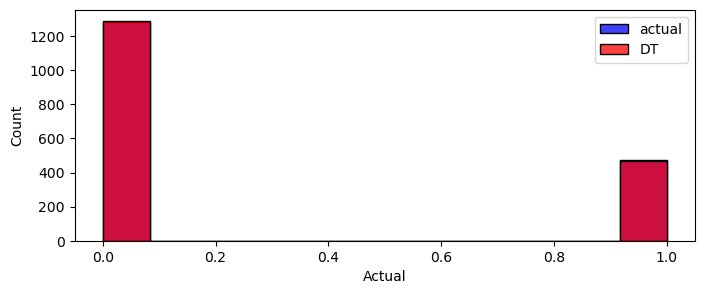

In [89]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', label="actual")
sns.histplot(output_df['DecisionTreeClassifier'], color='red', label="DT")

plt.legend()

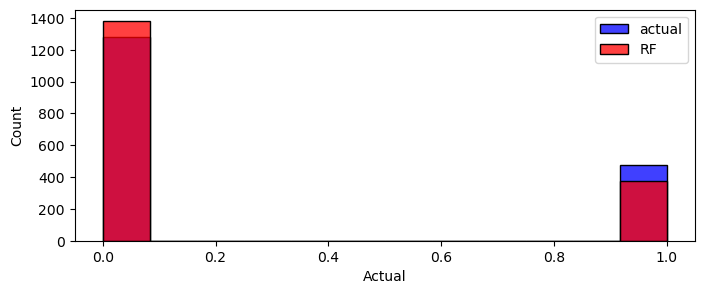

In [90]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', label="actual")
sns.histplot(output_df['RandomForestClassifier'], color='red', label="RF")

plt.legend()

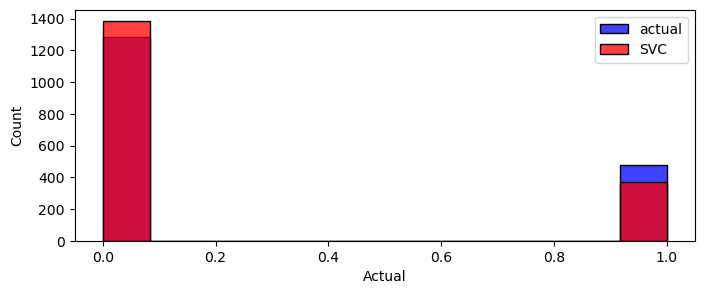

In [91]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', label="actual")
sns.histplot(output_df['SupportVectorClassifier'], color='red', label="SVC")
plt.legend()

In [98]:
models =  [('KNeighborsRegressor', KNN),
          ('LogisticRegression', LR),
          ('DecisionTreeClassifier', DT),
          ('RandomForestClassifier', RF),
          ('SupportVectorClassifier', SVC)
         ]

In [99]:
Model_Data = pd.DataFrame(data = models, columns = ['Model', 'Score'])

In [100]:
Model_Data

,Model,Score
0,KNeighborsRegressor,0.286803
1,LogisticRegression,0.804323
2,DecisionTreeClassifier,0.689989
3,RandomForestClassifier,0.789534
4,SupportVectorClassifier,0.802048


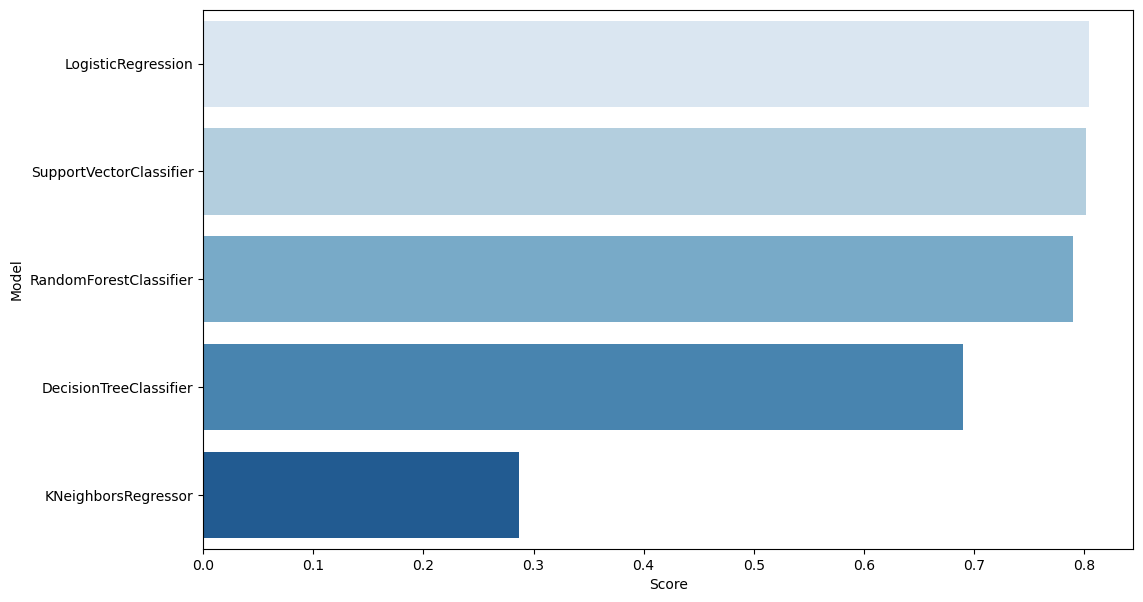

In [101]:
plt.figure(figsize=(12,7))
Model_Data.sort_values(by=['Score'], ascending=False, inplace=True)

sns.barplot(x='Score', y='Model',data = Model_Data, palette='Blues')
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

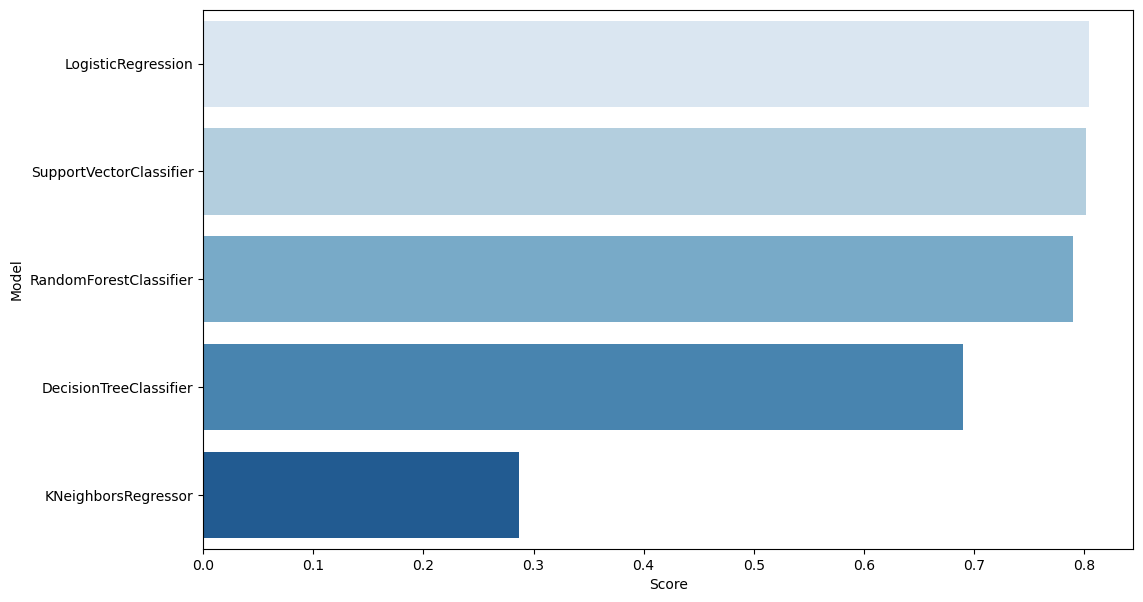

In [102]:
plt.figure(figsize=(12,7))
Model_Data.sort_values(by=['Score'], ascending=False, inplace=True)

sns.barplot(x='Score', y='Model',data = Model_Data, palette='Blues')
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

# Hyperparameter Tuning

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [66]:
knn_clf.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'n_neighbors': list(range(1,9)),'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
gs = GridSearchCV(knn_clf,param_grid,cv=10)
gs.fit(X_train_transformed, y_train)

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3new1\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\anaconda3new1\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
             

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [71]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [72]:
gs.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 8}

In [73]:
gs.cv_results_['mean_test_score']

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.71407157, 0.74933802,
       0.74820058, 0.76583721, 0.76413303, 0.77171813, 0.77285342,
       0.77948903, 0.71407157, 0.74933802, 0.74820022, 0.76583721,
       0.76394363, 0.77171813, 0.77266402, 0.77910988,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan])

In [74]:
print(gs.score(X_test_transformed,y_test))

0.7781569965870307
